## Notebook to visualize data for the TNE project

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [22]:
from legend_dictionaries import *
from constants import output_file, sheet_name, columns_dictionary
from classes import tne_row

In [23]:
cwd = os.getcwd()
full_file_name = cwd + "/" + output_file

xl = pd.ExcelFile(full_file_name)
df = xl.parse(sheet_name)

In [24]:
tne_objects = []

In [25]:
for idx, row in df.iterrows():
    name = row[columns_dictionary["name_col"]]
    mrn = row[columns_dictionary["mrn_col"]]
    dob = row[columns_dictionary["dob_col"]]
    age = row[columns_dictionary["age_col"]]
    sex = row[columns_dictionary["sex_col"]]
    race = row[columns_dictionary["race_col"]]
    procedure_date = row[columns_dictionary["procedure_date_col"]]
    co_morbidities = row[columns_dictionary["comorbidities_col"]]
    prev_barium_swallow = row[columns_dictionary["barium_col"]]
    tne_indication = row[columns_dictionary["tne_indication_col"]]
    surgeon = row[columns_dictionary["surgeon_col"]]
    slp = row[columns_dictionary["slp_col"]]
    completion = row[columns_dictionary["procedure_completion_col"]]
    complications = row[columns_dictionary["complications_col"]]
    esoph_procedure = row[columns_dictionary["esophageal_procedure_col"]]
    laryngeal_procedure = row[columns_dictionary["laryngeal_procedure_col"]]
    abnormal_esoph_findings = row[columns_dictionary["abnormal_esoph_findings_col"]]
    cpt_code = row[columns_dictionary["cpt_col"]]
    icd_code = row[columns_dictionary["icd_col"]]
    
    tne_object = tne_row(
        name = name, mrn = mrn, dob = dob, age = age,
        sex = sex, race = race, procedure_date = procedure_date,
        co_morbidities = co_morbidities,
        prev_barium_swallow = prev_barium_swallow,
        tne_indication = tne_indication,
        surgeon = surgeon, slp = slp, completion = completion,
        complications = complications, esoph_procedure = esoph_procedure,
        laryngeal_procedure = laryngeal_procedure,
        abnormal_esoph_findings = abnormal_esoph_findings,
        cpt_code = cpt_code, icd_code = icd_code)
    
    tne_objects.append(tne_object)

In [26]:
len(tne_objects)

183

In [27]:
encountered_mrns = []

for obj in tne_objects:
    if obj.mrn not in encountered_mrns:
        encountered_mrns.append(obj.mrn)

num_distinct_mrns = len(encountered_mrns)
        
print(f"""
    There are {num_distinct_mrns} distinct MRNs.
""")


    There are 78 distinct MRNs.



## Patient Demographics

In [38]:
encountered_mrns = []

num_males, num_females = 0, 0
num_whites, num_hispanic, num_black, num_asian = 0, 0, 0, 0

for obj in tne_objects:

    if obj.mrn not in encountered_mrns:
        encountered_mrns.append(obj.mrn)
        
        # sex encoded as a tuple - take first
        if obj.sex[0] == 1:
            num_males += 1
        elif obj.sex[0] == 2:
            num_females += 1
            
        if obj.race[0] == 1:
            num_whites += 1
        elif obj.race[0] == 2:
            num_hispanic += 1
        elif obj.race[0] == 3:
            num_black += 1
        elif obj.race[0] == 4:
            num_asian += 1
            
print(f"""There are {num_males} males in the dataset and {num_females} females in the dataset""")

print(f"""
There are:
    {num_whites} white persons in the dataset
    {num_hispanic} hispanic persons in the dataset
    {num_black} black persons in the dataset
    {num_asian} Asian persons in the dataset
""")

There are 58 males in the dataset and 20 females in the dataset

There are:
    64 white persons in the dataset
    1 hispanic persons in the dataset
    10 black persons in the dataset
    3 Asian persons in the dataset



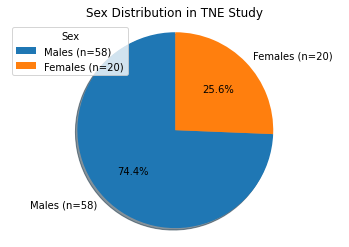

In [45]:
fig = plt.figure()
plt.pie([num_males, num_females], labels = [
    'Males (n={num_males})'.format(num_males=num_males),
    'Females (n={num_females})'.format(num_females=num_females)], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Sex Distribution in TNE Study')
plt.axis('equal')
plt.legend(title = 'Sex')

plt.show()
fig.savefig('sex_distribution.png')

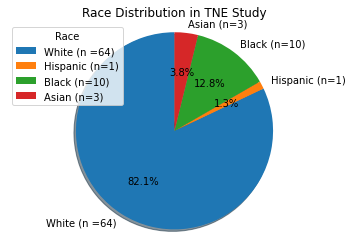

In [44]:
fig = plt.figure()
plt.pie([num_whites, num_hispanic, num_black, num_asian],
        labels = ['White (n ={num_whites})'.format(num_whites=num_whites),
                  'Hispanic (n={num_hispanic})'.format(num_hispanic=num_hispanic),
                  'Black (n={num_black})'.format(num_black=num_black),
                  'Asian (n={num_asian})'.format(num_asian=num_asian)], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Race Distribution in TNE Study')
plt.axis('equal')
plt.legend(title = 'Race')

plt.show()
fig.savefig('race_distribution.png')